In [1]:
import os, sys
import gymnasium as gym
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle

import text_flappy_bird_gym
from q_learning_agent import QLearningAgent

In [2]:
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
obs = env.reset()

In [3]:
def train_agent(num_episodes, max_steps_per_episode):
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)

    agent_info = {"num_actions": 2, "epsilon": 0.1, "step_size": 0.1, "discount": 0.99, "seed": 42, "policy": None}
    agent = QLearningAgent()
    agent.agent_init(agent_info)
    total_rewards = 0

    episode_rewards = []

    for episode in range(num_episodes):
        obs, _ = env.reset()
        action = agent.agent_start(obs)
        obs, reward, done, _, _ = env.step(action)

        for step in range(max_steps_per_episode):
            action = agent.agent_step(reward, state=obs)
            obs, reward, done, _, _ = env.step(action)
            total_rewards += reward

            if done:
                agent.agent_end(reward)
                break
        
        episode_rewards.append(total_rewards)

        if (episode + 1) % 100 == 0:
            avg_reward = total_rewards / (episode + 1)
            print(f"Episode {episode + 1}, Average reward: {avg_reward:.2f}")

    return agent, episode_rewards

In [4]:
num_episodes = 5000
episode_rewards = []
max_steps_per_episode = 1000

trained_agent, episode_rewards = train_agent(num_episodes, max_steps_per_episode)
trained_agent.save_agent("trained_agent.pkl")

Episode 100, Average reward: 10.95
Episode 200, Average reward: 10.93
Episode 300, Average reward: 10.98
Episode 400, Average reward: 10.89
Episode 500, Average reward: 11.03
Episode 600, Average reward: 10.96
Episode 700, Average reward: 10.98
Episode 800, Average reward: 11.20
Episode 900, Average reward: 11.50
Episode 1000, Average reward: 11.79
Episode 1100, Average reward: 11.95
Episode 1200, Average reward: 12.09
Episode 1300, Average reward: 12.26
Episode 1400, Average reward: 12.41
Episode 1500, Average reward: 12.66
Episode 1600, Average reward: 12.72
Episode 1700, Average reward: 12.85
Episode 1800, Average reward: 12.92
Episode 1900, Average reward: 13.04
Episode 2000, Average reward: 13.15
Episode 2100, Average reward: 13.26
Episode 2200, Average reward: 13.40
Episode 2300, Average reward: 13.53
Episode 2400, Average reward: 13.71
Episode 2500, Average reward: 14.08
Episode 2600, Average reward: 14.40
Episode 2700, Average reward: 14.94
Episode 2800, Average reward: 15.33
E

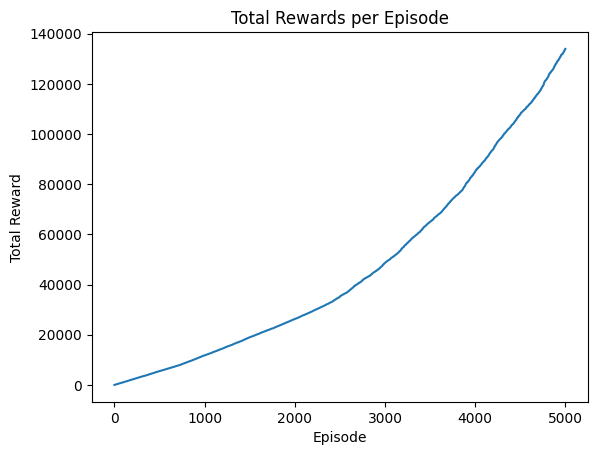

In [5]:
def plot_rewards(episode_rewards):
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Rewards per Episode')
    plt.show()

plot_rewards(episode_rewards)

Perform a Random Search for agent param

In [33]:
# Define the ranges for your hyperparameters
epsilon_range = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
step_size_range = [0.1, 0.2, 0.3, 0.4, 0.5]
discount_range = [0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

In [34]:
def evaluate_agent(agent, num_eval_episodes, max_steps_per_episode):
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)

    total_rewards = 0
    for episode in range(num_eval_episodes):
        obs, _ = env.reset()
        action = agent.agent_start(obs)
        obs, reward, done, _, _ = env.step(action)

        for step in range(max_steps_per_episode):
            action = agent.agent_step(reward, state=obs)
            obs, reward, done, _, _ = env.step(action)
            total_rewards += reward

            if done:
                agent.agent_end(reward)
                break

    avg_reward = total_rewards / num_eval_episodes
    return avg_reward


In [37]:
best_hyperparams = None
best_avg_reward = -float("inf")

for epsilon in epsilon_range:
    for step_size in step_size_range:
        for discount in discount_range:
            print(f"Training with epsilon={epsilon}, step_size={step_size}, discount={discount}")

            agent_info = {"num_actions": 2, "epsilon": epsilon, "step_size": step_size, "discount": discount, "seed": 42, "policy": None}
            agent = QLearningAgent()
            agent.agent_init(agent_info)

            num_training_episodes = 1000  # You may want to use fewer episodes for faster experimentation
            max_steps_per_episode = 1000

            train_agent(num_training_episodes, max_steps_per_episode)

            num_eval_episodes = 100
            avg_reward = evaluate_agent(agent, num_eval_episodes, max_steps_per_episode)
            print(f"Average reward: {avg_reward:.2f}")

            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
                best_hyperparams = {"epsilon": epsilon, "step_size": step_size, "discount": discount}

print("Best hyperparameters:", best_hyperparams)
print("Best average reward:", best_avg_reward)


Training with epsilon=0.01, step_size=0.1, discount=0.5
Episode 100, Average reward: 8.40
Episode 200, Average reward: 8.66
Episode 300, Average reward: 8.49
Episode 400, Average reward: 8.68
Episode 500, Average reward: 8.93
Episode 600, Average reward: 9.23
Episode 700, Average reward: 9.42
Episode 800, Average reward: 9.47
Episode 900, Average reward: 9.52
Episode 1000, Average reward: 9.68
Average reward: 10.85
Training with epsilon=0.01, step_size=0.1, discount=0.6
Episode 100, Average reward: 11.00
Episode 200, Average reward: 11.23
Episode 300, Average reward: 13.67
Episode 400, Average reward: 14.38
Episode 500, Average reward: 14.55
Episode 600, Average reward: 14.60
Episode 700, Average reward: 14.82
Episode 800, Average reward: 15.01
Episode 900, Average reward: 15.10
Episode 1000, Average reward: 15.38
Average reward: 13.34
Training with epsilon=0.01, step_size=0.1, discount=0.7
Episode 100, Average reward: 9.72
Episode 200, Average reward: 9.78
Episode 300, Average reward:

In [49]:
def train_agent(num_episodes, max_steps_per_episode, agent):
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)
    episode_rewards = []

    for episode in range(num_episodes):
        obs, _ = env.reset()
        action = agent.agent_start(obs)
        obs, reward, done, _, _ = env.step(action)

        total_rewards = 0
        for step in range(max_steps_per_episode):
            action = agent.agent_step(reward, state=obs)
            obs, reward, done, _, _ = env.step(action)
            total_rewards += reward

            if done:
                agent.agent_end(reward)
                break

        episode_rewards.append(total_rewards)

    return agent, episode_rewards


In [50]:
hyperparams_results = []

for epsilon in epsilon_range:
    for step_size in step_size_range:
        for discount in discount_range:
            print(f"Training with epsilon={epsilon}, step_size={step_size}, discount={discount}")

            agent_info = {"num_actions": 2, "epsilon": epsilon, "step_size": step_size, "discount": discount, "seed": 42, "policy": None}
            agent = QLearningAgent()
            agent.agent_init(agent_info)

            num_training_episodes = 1000
            max_steps_per_episode = 1000

            trained_agent, episode_rewards = train_agent(num_training_episodes, max_steps_per_episode, agent)

            num_eval_episodes = 100
            avg_reward = evaluate_agent(trained_agent, num_eval_episodes, max_steps_per_episode)
            print(f"Average reward: {avg_reward:.2f}")

            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
                best_hyperparams = {"epsilon": epsilon, "step_size": step_size, "discount": discount}

            # Store the episode rewards and average reward for each combination
            hyperparams_results.append({"epsilon": epsilon, "step_size": step_size, "discount": discount, "episode_rewards": episode_rewards, "avg_reward": avg_reward})

print("Best hyperparameters:", best_hyperparams)
print("Best average reward:", best_avg_reward)


Training with epsilon=0.01, step_size=0.1, discount=0.5
Average reward: 10.03
Training with epsilon=0.01, step_size=0.1, discount=0.6
Average reward: 12.67
Training with epsilon=0.01, step_size=0.1, discount=0.7
Average reward: 10.10
Training with epsilon=0.01, step_size=0.1, discount=0.8
Average reward: 9.89
Training with epsilon=0.01, step_size=0.1, discount=0.9
Average reward: 11.87
Training with epsilon=0.01, step_size=0.1, discount=0.99
Average reward: 8.22
Training with epsilon=0.01, step_size=0.2, discount=0.5
Average reward: 11.76
Training with epsilon=0.01, step_size=0.2, discount=0.6
Average reward: 12.90
Training with epsilon=0.01, step_size=0.2, discount=0.7
Average reward: 9.15
Training with epsilon=0.01, step_size=0.2, discount=0.8
Average reward: 13.20
Training with epsilon=0.01, step_size=0.2, discount=0.9
Average reward: 10.29
Training with epsilon=0.01, step_size=0.2, discount=0.99
Average reward: 23.08
Training with epsilon=0.01, step_size=0.3, discount=0.5
Average r

In [51]:
def plot_best_combinations(hyperparams_results, n_best=5):
    # Sort the results by average reward
    sorted_results = sorted(hyperparams_results, key=lambda x: x["avg_reward"], reverse=True)

    # Select the best n combinations
    best_combinations = sorted_results[:n_best]

    # Plot the episode rewards for each of the best combinations
    for result in best_combinations:
        epsilon = result["epsilon"]
        step_size = result["step_size"]
        discount = result["discount"]
        episode_rewards = result["episode_rewards"]
        plt.plot(episode_rewards, label=f"e={epsilon}, s={step_size}, d={discount}")

    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Rewards per Episode for Best Combinations')
    plt.legend()
    plt.show()


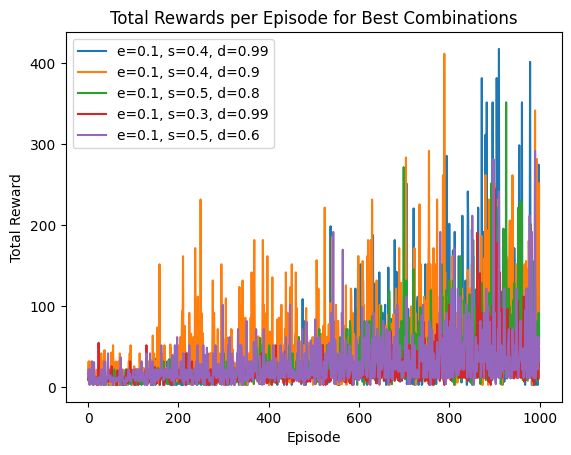

In [52]:
plot_best_combinations(hyperparams_results, n_best=5)


In [53]:
def plot_best_avg_rewards(hyperparams_results, n_best=5):
    # Sort the results by average reward
    sorted_results = sorted(hyperparams_results, key=lambda x: x["avg_reward"], reverse=True)

    # Select the best n combinations
    best_combinations = sorted_results[:n_best]

    # Extract the hyperparameters and average rewards for the best combinations
    hyperparams = [f"e={r['epsilon']}, s={r['step_size']}, d={r['discount']}" for r in best_combinations]
    avg_rewards = [r["avg_reward"] for r in best_combinations]

    # Plot the average rewards for the best combinations
    plt.bar(hyperparams, avg_rewards)
    plt.xlabel('Hyperparameter Combination')
    plt.ylabel('Average Reward')
    plt.title('Best Average Rewards for Different Combinations')
    plt.xticks(rotation=45)
    plt.show()


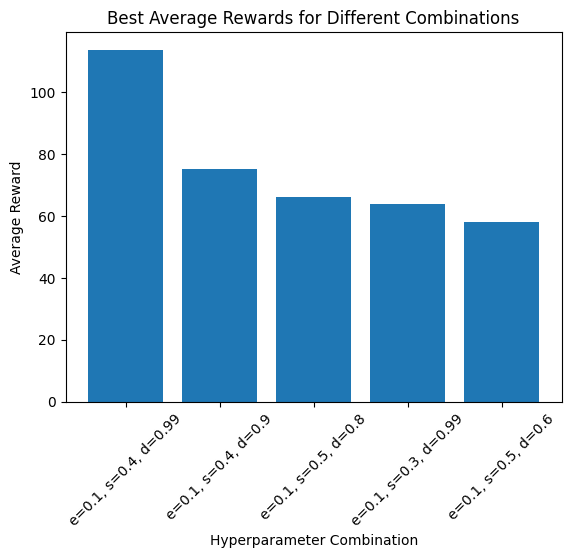

In [54]:
plot_best_avg_rewards(hyperparams_results, n_best=5)


# TRAIN THE AGENT WITH BEST HYPS

In [55]:
def train_agent(num_episodes, max_steps_per_episode, agent_info):
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)

    agent = QLearningAgent()
    agent.agent_init(agent_info)
    total_rewards = 0

    episode_rewards = []

    for episode in range(num_episodes):
        obs, _ = env.reset()
        action = agent.agent_start(obs)
        obs, reward, done, _, _ = env.step(action)

        for step in range(max_steps_per_episode):
            action = agent.agent_step(reward, state=obs)
            obs, reward, done, _, _ = env.step(action)
            total_rewards += reward

            if done:
                agent.agent_end(reward)
                break
        
        episode_rewards.append(total_rewards)

        if (episode + 1) % 100 == 0:
            avg_reward = total_rewards / (episode + 1)
            print(f"Episode {episode + 1}, Average reward: {avg_reward:.2f}")

    return agent, episode_rewards

In [57]:
num_episodes = 20000
episode_rewards = []
max_steps_per_episode = 1000
agent_info = {"num_actions": 2, "epsilon": 0.1, "step_size": 0.4, "discount": 0.99, "seed": 42, "policy": None}

trained_agent, episode_rewards = train_agent(num_episodes, max_steps_per_episode, agent_info)
trained_agent.save_agent("trained_agent.pkl")

Episode 100, Average reward: 10.03
Episode 200, Average reward: 11.60
Episode 300, Average reward: 12.20
Episode 400, Average reward: 12.53
Episode 500, Average reward: 13.01
Episode 600, Average reward: 13.52
Episode 700, Average reward: 13.74
Episode 800, Average reward: 14.96
Episode 900, Average reward: 16.25
Episode 1000, Average reward: 18.20
Episode 1100, Average reward: 21.79
Episode 1200, Average reward: 24.83
Episode 1300, Average reward: 27.40
Episode 1400, Average reward: 30.50
Episode 1500, Average reward: 33.42
Episode 1600, Average reward: 36.00
Episode 1700, Average reward: 38.40
Episode 1800, Average reward: 40.70
Episode 1900, Average reward: 43.87
Episode 2000, Average reward: 46.96
Episode 2100, Average reward: 49.18
Episode 2200, Average reward: 51.01
Episode 2300, Average reward: 53.12
Episode 2400, Average reward: 54.69
Episode 2500, Average reward: 56.20
Episode 2600, Average reward: 57.69
Episode 2700, Average reward: 59.81
Episode 2800, Average reward: 61.64
E